# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greenville
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | hotan
Processing Record 5 of Set 1 | ulladulla
Processing Record 6 of Set 1 | anaco
Processing Record 7 of Set 1 | hinton
Processing Record 8 of Set 1 | alotau
City not found. Skipping...
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | mossel bay
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | suai
City not found. Skipping...
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | marrakesh
Processing Record 17 of Set 1 | sabzevar
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of

Processing Record 38 of Set 4 | ust-nera
Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | grand falls-windsor
Processing Record 42 of Set 4 | laascaanood
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | hermanus
Processing Record 45 of Set 4 | francisco beltrao
Processing Record 46 of Set 4 | malinyi
Processing Record 47 of Set 4 | kuqa
Processing Record 48 of Set 4 | santa luzia
Processing Record 49 of Set 4 | mogocha
Processing Record 0 of Set 5 | tuncurry
Processing Record 1 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 2 of Set 5 | kingston
Processing Record 3 of Set 5 | weno
Processing Record 4 of Set 5 | murzuq
Processing Record 5 of Set 5 | monrovia
Processing Record 6 of Set 5 | caleta de carquin
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | mbanza-ngungu
Processing Record 9 of Set 5 | tahoua
Processing Record 10 of Set 5 | tingi
Processing Record 

Processing Record 29 of Set 8 | kachug
Processing Record 30 of Set 8 | yarmouth
Processing Record 31 of Set 8 | champerico
Processing Record 32 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 33 of Set 8 | tsiolkovskiy
City not found. Skipping...
Processing Record 34 of Set 8 | guaranda
Processing Record 35 of Set 8 | enewetak
Processing Record 36 of Set 8 | boguchany
Processing Record 37 of Set 8 | tefe
Processing Record 38 of Set 8 | erenhot
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | vozhega
Processing Record 41 of Set 8 | kulia village
City not found. Skipping...
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | colonia
Processing Record 44 of Set 8 | umba
Processing Record 45 of Set 8 | chinsali
Processing Record 46 of Set 8 | bengkulu
Processing Record 47 of Set 8 | whitby
Processing Record 48 of Set 8 | karema
Processing Record 49 of Set 8 | tionk essil
Processing Record 0 of Set 9 | mandan
Processing Recor

Processing Record 14 of Set 12 | rundu
Processing Record 15 of Set 12 | dunedin
Processing Record 16 of Set 12 | minacu
City not found. Skipping...
Processing Record 17 of Set 12 | paya
Processing Record 18 of Set 12 | marsa alam
Processing Record 19 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 12 | al bayda
Processing Record 21 of Set 12 | cassilandia
Processing Record 22 of Set 12 | pariang
City not found. Skipping...
Processing Record 23 of Set 12 | aitape
Processing Record 24 of Set 12 | mariehamn
Processing Record 25 of Set 12 | tahe
Processing Record 26 of Set 12 | strezhevoy
Processing Record 27 of Set 12 | baie-saint-paul
Processing Record 28 of Set 12 | lagoa
Processing Record 29 of Set 12 | leava
Processing Record 30 of Set 12 | benghazi
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | balaklava
Processing Record 33 of Set 12 | totness
Processing Record 34 of Set 12 | maun
Processing Record 35 of Set 12 | santa ana de 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,greenville,35.6127,-77.3663,9.52,61,0,0.89,US,1700370747
1,isafjordur,66.0755,-23.1240,3.40,89,100,1.31,IS,1700371013
2,adamstown,-25.0660,-130.1015,21.80,87,100,9.46,PN,1700371013
3,hotan,37.0997,79.9269,9.48,15,81,1.30,CN,1700371000
4,ulladulla,-35.3500,150.4667,35.98,55,16,8.47,AU,1700370946


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,greenville,35.6127,-77.3663,9.52,61,0,0.89,US,1700370747
1,isafjordur,66.0755,-23.1240,3.40,89,100,1.31,IS,1700371013
2,adamstown,-25.0660,-130.1015,21.80,87,100,9.46,PN,1700371013
3,hotan,37.0997,79.9269,9.48,15,81,1.30,CN,1700371000
4,ulladulla,-35.3500,150.4667,35.98,55,16,8.47,AU,1700370946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

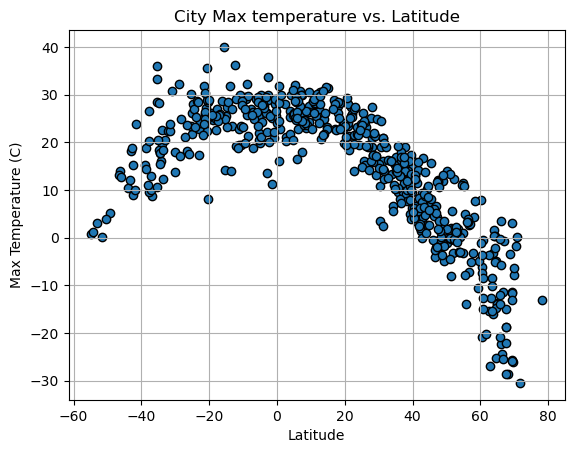

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

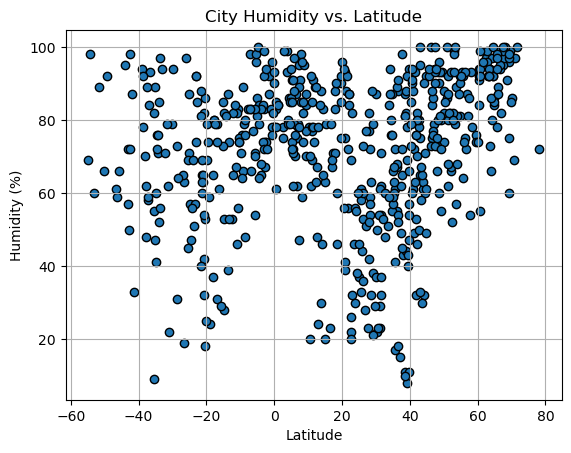

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

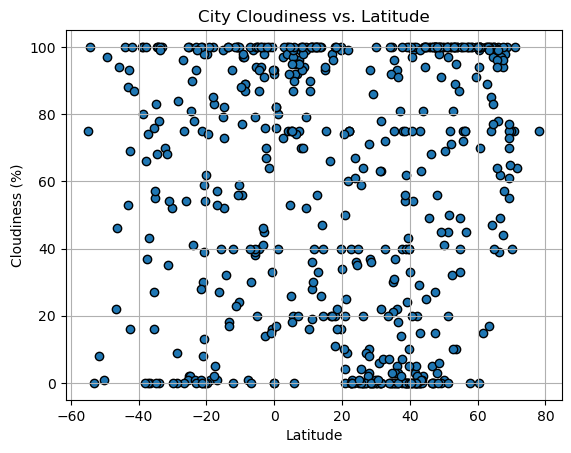

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

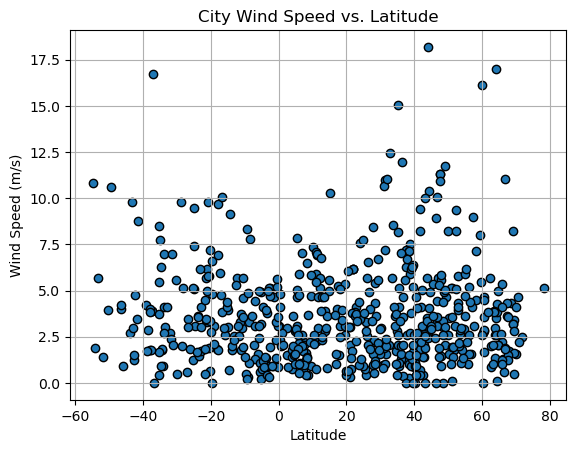

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def calc_linear_regression(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0, 0), fontsize=15,color="red")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,greenville,35.6127,-77.3663,9.52,61,0,0.89,US,1700370747
1,isafjordur,66.0755,-23.1240,3.40,89,100,1.31,IS,1700371013
3,hotan,37.0997,79.9269,9.48,15,81,1.30,CN,1700371000
5,anaco,9.4389,-64.4728,24.25,84,52,4.69,VE,1700371014
6,hinton,53.4001,-117.5857,1.71,79,89,2.66,CA,1700371014


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,21.80,87,100,9.46,PN,1700371013
4,ulladulla,-35.3500,150.4667,35.98,55,16,8.47,AU,1700370946
7,invercargill,-46.4000,168.3500,13.90,59,46,4.02,NZ,1700370754
8,mossel bay,-34.1831,22.1460,15.96,71,100,0.92,ZA,1700371015
10,waitangi,-43.9535,-176.5597,10.46,95,100,2.68,NZ,1700371016


###  Temperature vs. Latitude Linear Regression Plot

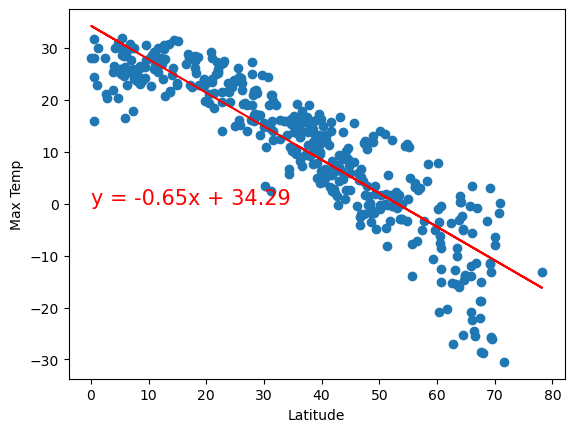

In [37]:
# Linear regression on Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp')

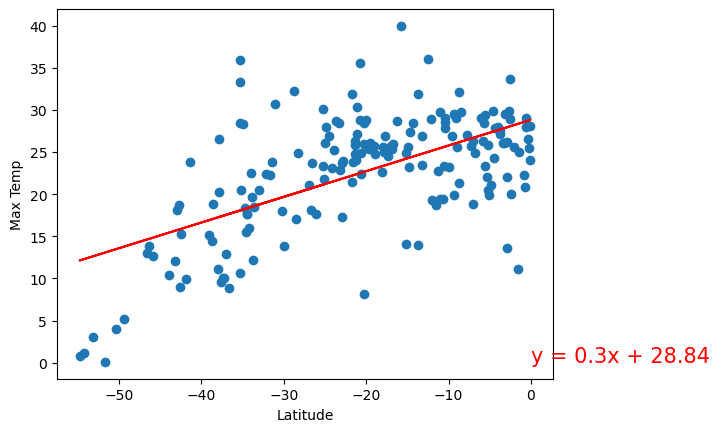

In [38]:
# Linear regression on Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp')

**Discussion about the linear relationship:** The scatter plot verifies that max temperature is at the equator. As we go towards north pole or south pole temperature decreases.The temperature at north pole is below 0 indicating that it is winter at north pole. The south pole temperature indicates summer at south pole.

### Humidity vs. Latitude Linear Regression Plot

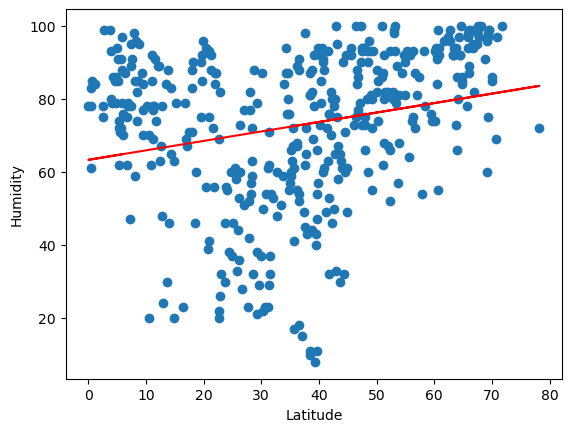

In [39]:
# Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity')

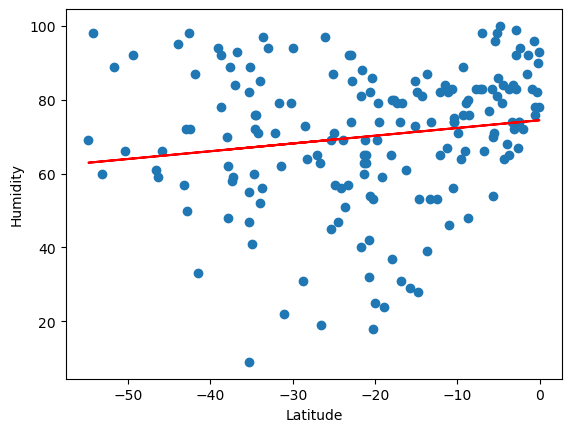

In [40]:
# Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity')

**Discussion about the linear relationship:** The humidity in northern hemisphere is maximum around tropic of cancer. This corresponds with the tropical weather areas in the northern hemisphere. In southern hemisphere land masses are less compared to north hemisphere. In sourthen hemisphere the high humidity is spread over wider area.

### Cloudiness vs. Latitude Linear Regression Plot

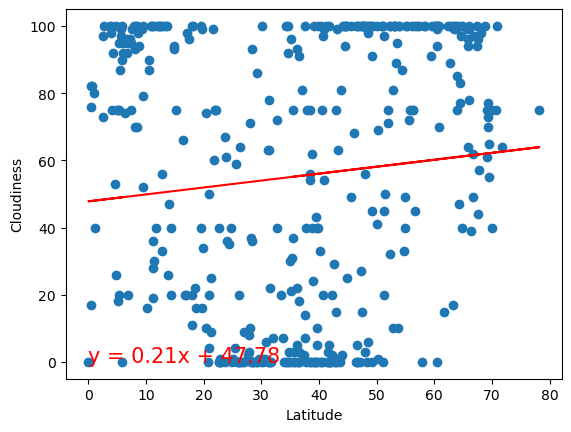

In [41]:
# Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness')

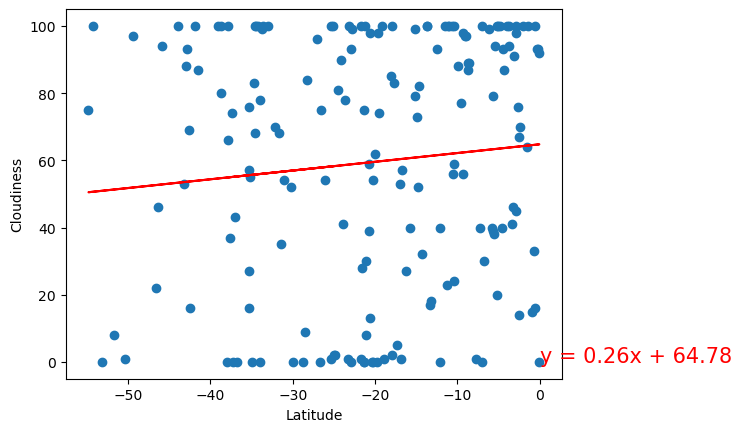

In [42]:
# Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness')

**Discussion about the linear relationship:** From the scattered plot there seems less correlation between cloudiness and latitude. This indicates that cloudiness depends on other factors such as local topography

### Wind Speed vs. Latitude Linear Regression Plot

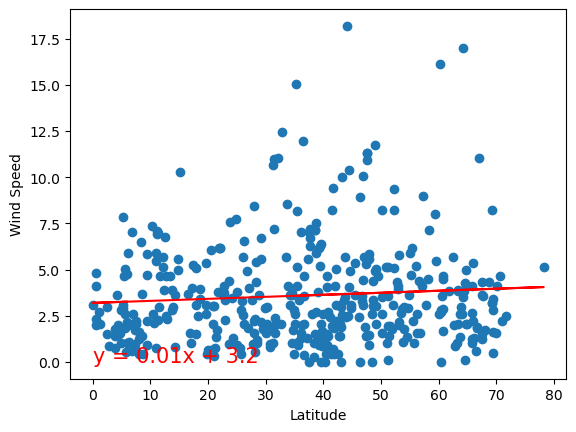

In [43]:
# Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed')

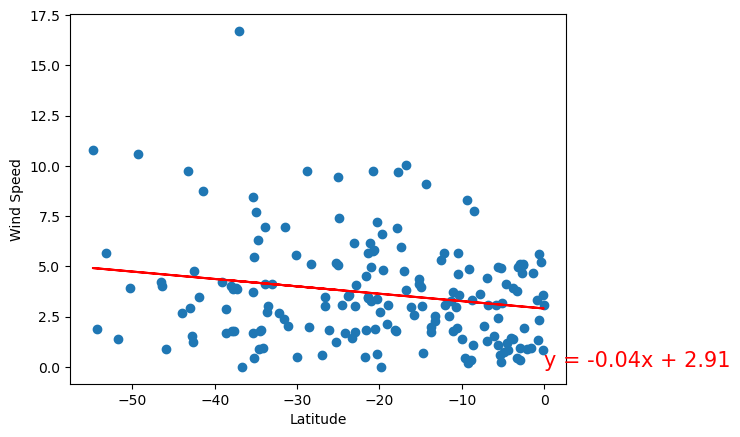

In [44]:
# Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed')

**Discussion about the linear relationship:** As the latitude increases in northern hemisphere, the range of wind speed increases. There are quite a few cities which have low wind speed even at higher latitude. But the variation in wind speed at higher latitude is more. In southern hemisphere as the latitude decreases the variation the wind speed increases. 